In [1]:
import os
os.chdir('/home/xzhoubi/hudson/VAE_baselines/')
import torch
import torch.nn as nn
from torch import optim
from network import *
from distributions import *
from utils import *
from dataset import *
from model import *
import torch.distributions as dis
from torch.distributions.bernoulli import Bernoulli
import numpy as np
import torch.nn.functional as F
from utils import batch_KL_diag_gaussian_std
from custom_optimizer import SGLD
eps = 1e-7


In [3]:
opt = {}
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    opt["device"] = torch.device("cuda:0")
    opt["if_cuda"] = True
else:
    opt["device"] = torch.device("cpu")
    opt["if_cuda"] = False

opt['z_dim'] = 100
opt['data_set'] = 'ColoredMNIST'
opt['x_dis'] = 'Logistic'  ## or MixLogistic
opt['dataset_path'] = '../data/'
opt['save_path'] = './save/'
opt['result_path'] = './result/'
opt['batch_size'] = 200
opt['test_batch_size'] = 200
opt['if_regularizer'] = False
opt['load_model'] = False
opt['data_aug'] = False
opt["seed"] = 0
opt['if_save_model'] = True
opt['save_epoch'] = 50
opt['additional_epochs'] = 100
opt['sample_size'] = 100
opt['if_save_latent'] = True
opt['alpha'] = 1.0

np.random.seed(opt['seed'])
torch.manual_seed(opt['seed'])

train_data, test_data, train_data_evaluation = LoadData(opt)
model = dense_VAE(opt).to(opt['device'])

Colored MNIST dataset already exists
Colored MNIST dataset already exists


In [4]:
model.load_state_dict(torch.load('./save/ColoredMNIST/architecture_dense_vae__alpha_1.0/model.pth'))


<All keys matched successfully>

100%|██████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.45it/s]


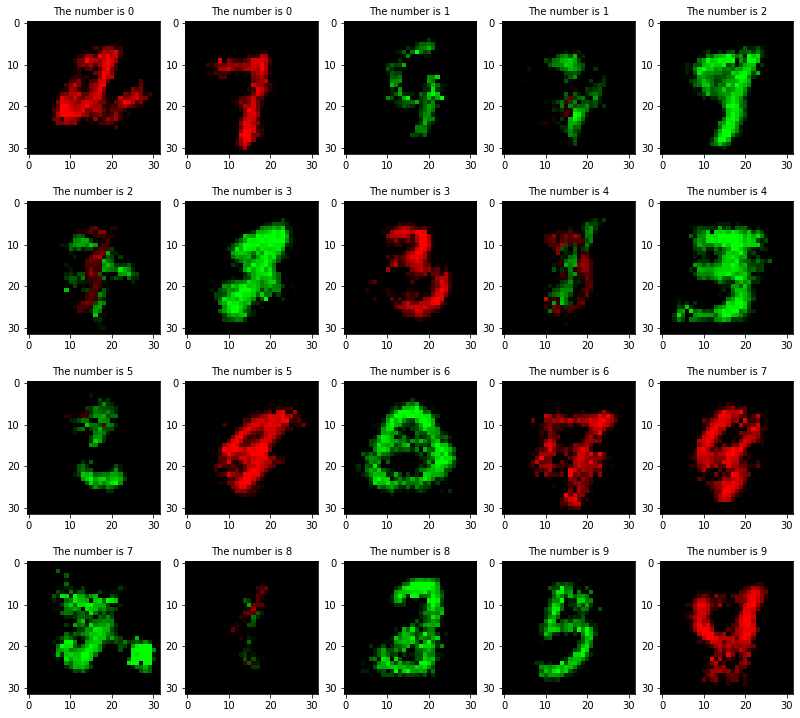

In [11]:
fig, ax = plt.subplots(4, 5, figsize=(11, 10), constrained_layout=True)
ax = ax.flatten()

for i in tqdm(range(10)):
    sample = model.conditional_sample([torch.tensor([i]), torch.tensor([0])], optimi='adam')
    ax[2*i].imshow(np.moveaxis(sample.cpu().numpy().reshape([3, 32, 32]), 0, -1))
    ax[2*i].set_title(f'The number is {i}', fontsize=10)
    
    sample = model.conditional_sample([torch.tensor([i]), torch.tensor([0])], optimi='adam')
    ax[2*i+1].imshow(np.moveaxis(sample.cpu().numpy().reshape([3, 32, 32]), 0, -1))
    ax[2*i+1].set_title(f'The number is {i}', fontsize=10)
    
plt.show()

100%|██████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.24it/s]


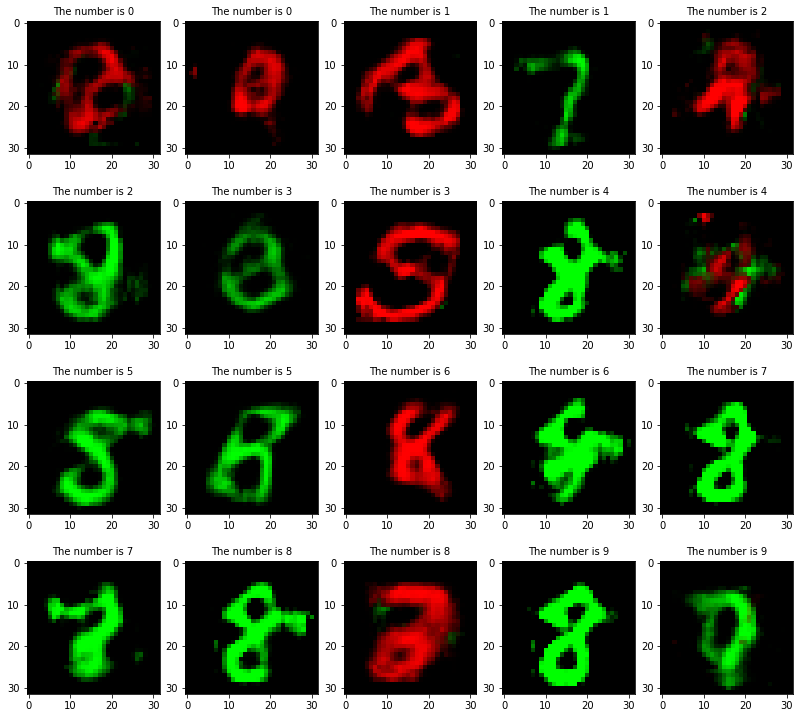

In [13]:
#%%
fig, ax = plt.subplots(4, 5, figsize=(11, 10), constrained_layout=True)
ax = ax.flatten()

for i in tqdm(range(10)):
    sample = model.conditional_sample([torch.tensor([i]), torch.tensor([0])], optimi='sgld')
    ax[2*i].imshow(np.moveaxis(sample.cpu().numpy().reshape([3, 32, 32]), 0, -1))
    ax[2*i].set_title(f'The number is {i}', fontsize=10)
    
    sample = model.conditional_sample([torch.tensor([i]), torch.tensor([0])], optimi='sgld')
    ax[2*i+1].imshow(np.moveaxis(sample.cpu().numpy().reshape([3, 32, 32]), 0, -1))
    ax[2*i+1].set_title(f'The number is {i}', fontsize=10)
    
plt.show()